In [15]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import math
from sklearn.decomposition import PCA
from numpy import linalg as LA
sns.set()

In [3]:
fred = Fred(api_key='5079f41d061a4037d81f3da69e018803')
series_ids = ['DGS6MO', 'DGS1', 'DGS3', 'DGS5', \
              'DGS10', 'DGS20', 'DGS30']

In [4]:
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="2020-01-01", observation_end="2024-05-03")
    return data

yields_d = {series_id: get_yield_data(series_id) for series_id in series_ids}
yields = pd.DataFrame(yields_d)
yields.columns = ['6 Month', '1 Year', '3 Year', '5 Year', \
                  '10 Year', '20 Year', '30 Year']
yields.index = pd.to_datetime(yields.index)
yields = yields.dropna()
yields

,6 Month,1 Year,3 Year,5 Year,10 Year,20 Year,30 Year
2020-01-02,1.57,1.56,1.59,1.67,1.88,2.19,2.33
2020-01-03,1.55,1.55,1.54,1.59,1.80,2.11,2.26
2020-01-06,1.56,1.54,1.56,1.61,1.81,2.13,2.28
2020-01-07,1.56,1.53,1.55,1.62,1.83,2.16,2.31
2020-01-08,1.56,1.55,1.61,1.67,1.87,2.21,2.35
...,...,...,...,...,...,...,...
2024-04-29,5.43,5.20,4.80,4.65,4.63,4.86,4.75
2024-04-30,5.44,5.25,4.87,4.72,4.69,4.90,4.79
2024-05-01,5.43,5.21,4.79,4.64,4.63,4.85,4.74
2024-05-02,5.42,5.16,4.71,4.57,4.58,4.82,4.72


In [5]:
pip install nelson_siegel_svensson


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
t = np.array([0.5,1,3,5,10,20,30])
y = np.array(yields.loc["2024-05-03"])

NelsonSiegelCurve(beta0=4.820017888453549, beta1=0.9216139083815179, beta2=-2.389113874880242, tau=2.1135354375132294)

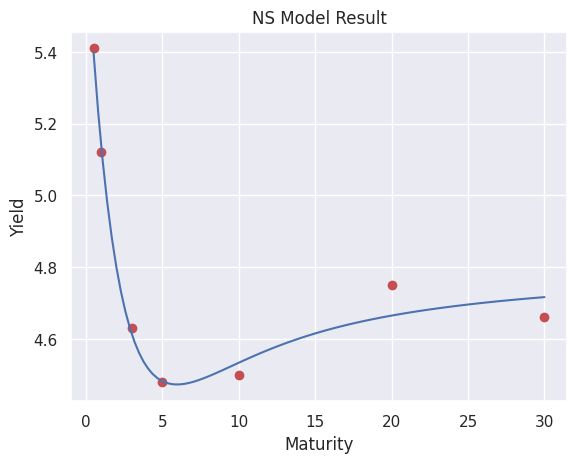

In [7]:
curve, status = calibrate_ns_ols(t, y, tau0=1.0)
assert status.success
y_est = curve
t_est = np.linspace(0.5,30,100)
plt.plot(t, y, 'ro')
plt.plot(t_est, y_est(t_est))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("NS Model Result")
curve

Text(0.5, 1.0, 'Cubic Spline Result')

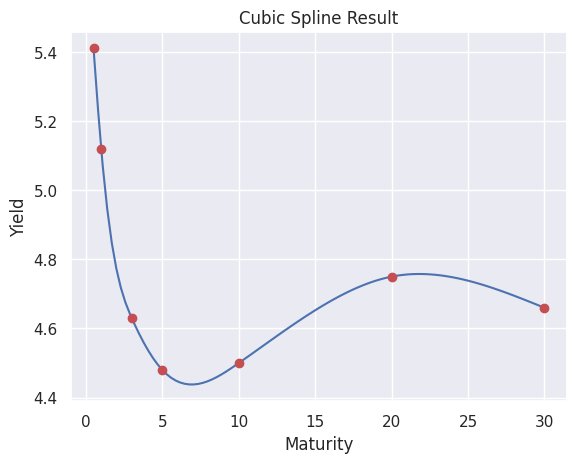

In [8]:
from scipy.interpolate import CubicSpline
t = np.array([0.5,1,3,5,10,20,30])
y = np.array(yields.loc["2024-05-03"])
f = CubicSpline(t, y, bc_type='natural')
t_new = np.linspace(0.5,30,100)
y_new = f(t_new)
plt.plot(t_new, y_new)
plt.plot(t, y, 'ro')
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Cubic Spline Result")

In [9]:
# The following is for Task 3
mean = 0  
std_dev = 0.01  
num_variables = 5  # Number of random variables
num_samples = 1  # Single sample of each

np.random.seed(42)  
random_variables = np.random.normal(mean, std_dev, (num_samples, num_variables))

print(random_variables)

[[ 0.00496714 -0.00138264  0.00647689  0.0152303  -0.00234153]]


In [10]:
num_samples = 10  # Expand to 10 samples
random_variables_multiple = random_variables + np.random.normal(0, 0.0001, (num_samples, 5))
cov_matrix = np.cov(random_variables_multiple, rowvar=False)
pca = PCA()
pca.fit(cov_matrix)
principal_components = pca.components_
explained_variance = pca.explained_variance_ratio_

print("\nPrincipal Components (Eigenvectors):")
print(principal_components)
print("\nExplained Variance Ratios:")
print(explained_variance)


Principal Components (Eigenvectors):
[[-0.20194479  0.52911366 -0.41790326 -0.08770455  0.70492681]
 [-0.34440756  0.63113918  0.44985046 -0.39355854 -0.3546731 ]
 [ 0.69421065  0.05722716 -0.18585788 -0.6918283  -0.0403369 ]
 [-0.22622202 -0.4614553   0.51389309 -0.43425683  0.53218183]
 [ 0.55452403  0.32478627  0.56952802  0.41257023  0.30404048]]

Explained Variance Ratios:
[7.46026249e-01 1.51998062e-01 8.93912327e-02 1.25844556e-02
 5.16402205e-34]


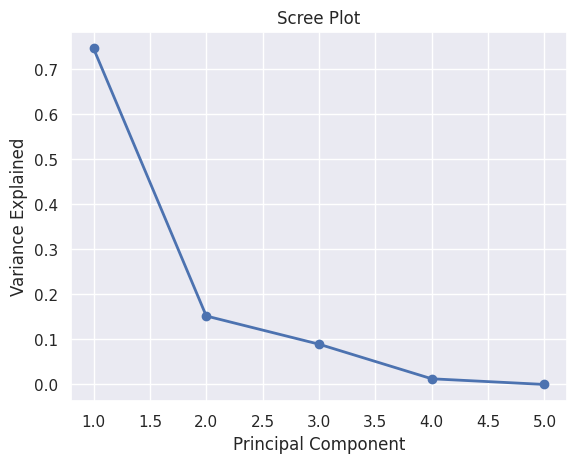

In [11]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [12]:
yields = yields[["6 Month", "1 Year", "3 Year", "5 Year", "10 Year"]]
yields = yields.dropna()
daily_yields = yields.pct_change()
daily_yields_filtered = daily_yields[daily_yields.index >= '2023-12-03']
daily_yields_filtered

,6 Month,1 Year,3 Year,5 Year,10 Year
2023-12-04,0.015009,0.009901,0.020882,0.021739,0.014218
2023-12-05,-0.007394,-0.007843,-0.015909,-0.021277,-0.023364
2023-12-06,0.001862,0.001976,0.000000,-0.004831,-0.014354
2023-12-07,-0.003717,-0.003945,-0.004619,-0.002427,0.004854
2023-12-08,0.005597,0.015842,0.032483,0.031630,0.021739
...,...,...,...,...,...
2024-04-29,0.005556,-0.001919,-0.008264,-0.006410,-0.008565
2024-04-30,0.001842,0.009615,0.014583,0.015054,0.012959
2024-05-01,-0.001838,-0.007619,-0.016427,-0.016949,-0.012793
2024-05-02,-0.001842,-0.009597,-0.016701,-0.015086,-0.010799


In [13]:
covariance_matrix = daily_yields_filtered.cov()
covariance_matrix
pca = PCA()
pca.fit(covariance_matrix)
principal_components = pca.components_
explained_variance = pca.explained_variance_ratio_

print("\nPrincipal Components (Eigenvectors):")
print(principal_components)
print("\nExplained Variance Ratios:")
print(explained_variance)


Principal Components (Eigenvectors):
[[-0.07930553 -0.26028494 -0.55415933 -0.59211031 -0.5179529 ]
 [-0.20249222 -0.57657443 -0.39882405  0.05788     0.68128417]
 [-0.48530221  0.72552298 -0.43448251 -0.03861165  0.21870586]
 [ 0.08136083 -0.07087925 -0.46972889  0.79048864 -0.37794051]
 [ 0.84295297  0.26154582 -0.35274146 -0.14032871  0.2773182 ]]

Explained Variance Ratios:
[9.91303253e-01 8.47130057e-03 1.55187392e-04 7.02589226e-05
 7.68298739e-35]


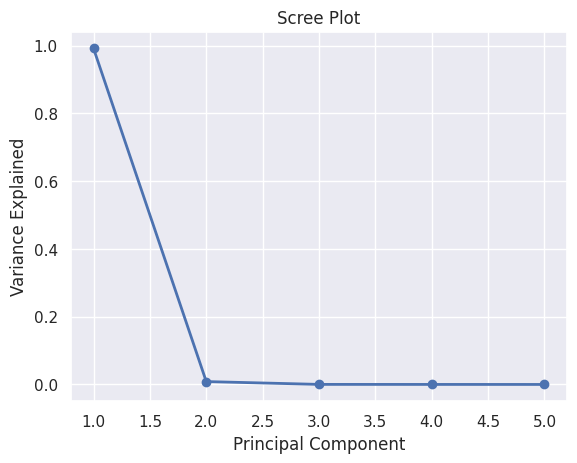

In [14]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [5]:
# The following is for Task 4
tickers = [
    "AAPL", "MSFT", "NVDA", "AVGO", "ORCL", "TSM", "ADBE", "CSCO", "CRM", "INTC",
    "TXN", "QCOM", "ACN", "AMD", "IBM", "AMAT", "NOW", "ADI", "NXPI", "LRCX",
    "PAYC", "SNPS", "FTNT", "PANW", "CDNS", "ANSS", "KEYS", "MU", "MPWR", "KLAC"
]
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.DateOffset(months=6)).strftime('%Y-%m-%d')
data = yf.download(tickers, start=start_date, end=end_date, interval="1d", group_by='ticker')
closing_prices = {ticker: data[ticker]['Close'] for ticker in tickers}
closing_prices_df = pd.DataFrame(closing_prices)
closing_prices_df

[*********************100%***********************]  30 of 30 completed


,AAPL,MSFT,NVDA,AVGO,ORCL,TSM,ADBE,CSCO,CRM,INTC,...,PAYC,SNPS,FTNT,PANW,CDNS,ANSS,KEYS,MU,MPWR,KLAC
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-08,227.306534,465.401154,128.180191,173.548660,144.297211,185.355087,575.400024,45.401287,256.274780,33.775742,...,140.027573,615.489990,60.110001,168.820007,317.359985,327.640015,138.100006,130.373627,848.907410,864.967285
2024-07-09,228.164581,458.713226,131.359726,172.301117,139.969177,183.259521,566.020020,45.145000,251.747070,34.371960,...,139.837997,607.940002,60.279999,168.089996,315.260010,327.350006,136.059998,130.822540,843.306641,873.302063
2024-07-10,232.454895,465.411133,134.889175,173.432343,141.352173,189.744904,564.549988,45.608284,251.906647,34.650192,...,139.957718,619.559998,59.590000,168.529999,319.799988,331.000000,137.520004,136.059830,857.866638,890.720154
2024-07-11,227.057098,453.881927,127.380325,169.581375,142.439713,183.239655,557.630005,46.091274,250.440613,33.288830,...,144.148071,608.739990,58.790001,165.520004,314.070007,327.269989,139.990005,129.914734,828.108765,851.392151
2024-07-12,230.020386,452.733978,129.220047,169.056519,144.445206,186.070190,559.049988,46.702408,253.282913,34.272591,...,148.088989,614.049988,59.549999,168.250000,315.670013,329.359985,142.110001,133.226700,852.744202,856.153381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30,252.199997,424.829987,137.490005,235.580002,166.910004,200.389999,445.799988,58.789391,335.739990,19.820000,...,204.440002,486.739990,95.129997,184.199997,301.859985,337.920013,161.169998,85.309998,602.400024,633.640015
2024-12-31,250.419998,421.500000,134.289993,231.839996,166.639999,197.490005,444.679993,58.799324,334.329987,20.049999,...,204.970001,485.359985,94.480003,181.960007,300.459991,337.329987,160.630005,84.160004,591.700012,630.119995
2025-01-02,243.850006,418.579987,138.309998,231.979996,166.029999,201.580002,441.000000,58.700001,330.660004,20.219999,...,201.399994,482.750000,94.750000,180.740005,297.660004,336.059998,160.839996,87.330002,594.219971,636.619995


In [20]:
daily_returns = closing_prices_df.pct_change().dropna()
daily_returns 

,AAPL,MSFT,NVDA,AVGO,ORCL,TSM,ADBE,CSCO,CRM,INTC,...,PAYC,SNPS,FTNT,PANW,CDNS,ANSS,KEYS,MU,MPWR,KLAC
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-09,0.003775,-0.014370,0.024805,-0.007188,-0.029994,-0.011306,-0.016302,-0.005645,-0.017667,0.017652,...,-0.001354,-0.012267,0.002828,-0.004324,-0.006617,-0.000885,-0.014772,0.003443,-0.006598,0.009636
2024-07-10,0.018804,0.014602,0.026869,0.006565,0.009881,0.035389,-0.002597,0.010262,0.000634,0.008095,...,0.000856,0.019114,-0.011447,0.002618,0.014401,0.011150,0.010731,0.040034,0.017265,0.019945
2024-07-11,-0.023221,-0.024772,-0.055667,-0.022204,0.007694,-0.034284,-0.012258,0.010590,-0.005820,-0.039289,...,0.029940,-0.017464,-0.013425,-0.017860,-0.017917,-0.011269,0.017961,-0.045165,-0.034688,-0.044153
2024-07-12,0.013051,-0.002529,0.014443,-0.003095,0.014080,0.015447,0.002546,0.013259,0.011349,0.029552,...,0.027339,0.008723,0.012927,0.016493,0.005094,0.006386,0.015144,0.025493,0.029749,0.005592
2024-07-15,0.016743,0.000904,-0.006190,0.007956,-0.011743,-0.011369,0.011913,0.000422,-0.004371,-0.000870,...,0.051742,0.003192,0.005877,0.013106,-0.000127,-0.005769,0.024066,-0.020067,0.017811,0.000466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30,-0.013263,-0.013240,0.003503,-0.025522,-0.012133,-0.006150,-0.001523,-0.007046,-0.008007,-0.023645,...,-0.011029,-0.008494,-0.009888,-0.010635,-0.010392,-0.005269,-0.010681,-0.036209,-0.014771,-0.017323
2024-12-31,-0.007058,-0.007838,-0.023275,-0.015876,-0.001618,-0.014472,-0.002512,0.000169,-0.004200,0.011604,...,0.002592,-0.002835,-0.006833,-0.012161,-0.004638,-0.001746,-0.003350,-0.013480,-0.017762,-0.005555
2025-01-02,-0.026236,-0.006928,0.029935,0.000604,-0.003661,0.020710,-0.008276,-0.001689,-0.010977,0.008479,...,-0.017417,-0.005377,0.002858,-0.006705,-0.009319,-0.003765,0.001307,0.037666,0.004259,0.010315


In [21]:
daily_returns_means = daily_returns.mean()
daily_returns_stds = daily_returns.std()
standardized_returns = (daily_returns - daily_returns_means) / daily_returns_stds

standardized_returns_dvd_sqrt_n=(standardized_returns/math.sqrt(len(standardized_returns)-1))
standardized_returns_cov = standardized_returns_dvd_sqrt_n.T@standardized_returns_dvd_sqrt_n
standardized_returns_cov

,AAPL,MSFT,NVDA,AVGO,ORCL,TSM,ADBE,CSCO,CRM,INTC,...,PAYC,SNPS,FTNT,PANW,CDNS,ANSS,KEYS,MU,MPWR,KLAC
AAPL,1.000000,0.560328,0.398547,0.367579,0.243876,0.359072,0.324499,0.246310,0.282489,0.229316,...,0.126635,0.411668,0.192342,0.402794,0.381076,0.475376,0.365399,0.306204,0.422209,0.403887
MSFT,0.560328,1.000000,0.496958,0.439703,0.540636,0.418683,0.390648,0.355489,0.386166,0.430174,...,-0.024213,0.558834,0.143533,0.502343,0.573280,0.524563,0.361604,0.396046,0.519900,0.454596
NVDA,0.398547,0.496958,1.000000,0.551871,0.427426,0.702929,0.329807,0.296197,0.412004,0.426441,...,0.047402,0.611778,0.013953,0.405113,0.551784,0.593905,0.424112,0.528773,0.649121,0.687008
AVGO,0.367579,0.439703,0.551871,1.000000,0.379655,0.646363,0.249623,0.223837,0.309744,0.355079,...,0.093969,0.525543,-0.011697,0.376971,0.534155,0.489901,0.374049,0.572495,0.611252,0.605885
ORCL,0.243876,0.540636,0.427426,0.379655,1.000000,0.300212,0.352013,0.362673,0.454833,0.379559,...,0.102359,0.513622,0.152683,0.466895,0.484256,0.482232,0.411386,0.286053,0.340308,0.321045
TSM,0.359072,0.418683,0.702929,0.646363,0.300212,1.000000,0.204235,0.186361,0.320130,0.403216,...,0.071797,0.536392,0.026247,0.300622,0.537173,0.560070,0.391983,0.587497,0.637320,0.701669
ADBE,0.324499,0.390648,0.329807,0.249623,0.352013,0.204235,1.000000,0.303947,0.422898,0.206875,...,0.210988,0.359240,0.143837,0.386327,0.378000,0.424442,0.287321,0.241545,0.260137,0.276163
CSCO,0.246310,0.355489,0.296197,0.223837,0.362673,0.186361,0.303947,1.000000,0.419540,0.431119,...,0.178611,0.299977,0.172520,0.340582,0.284140,0.322101,0.423645,0.286410,0.282352,0.207634
CRM,0.282489,0.386166,0.412004,0.309744,0.454833,0.320130,0.422898,0.419540,1.000000,0.327610,...,0.211285,0.528613,0.332525,0.500269,0.485518,0.552142,0.401487,0.343881,0.259994,0.389237
INTC,0.229316,0.430174,0.426441,0.355079,0.379559,0.403216,0.206875,0.431119,0.327610,1.000000,...,0.156316,0.562056,0.042875,0.371659,0.457860,0.516622,0.482092,0.457535,0.381590,0.537605


In [13]:
pca = PCA()
pca.fit(standardized_returns_cov)

principal_components = pca.components_  
explained_variance = pca.explained_variance_ratio_  

print("\nPrincipal Components (Eigenvectors):")
print(principal_components)

print("\nExplained Variance Ratios:")
print(explained_variance)


Principal Components (Eigenvectors):
[[-7.54532350e-02 -1.09479628e-01 -2.09009390e-01 -1.88298810e-01
  -1.34183275e-02 -2.31012212e-01  1.70613508e-02  3.78098113e-02
   7.40922630e-03 -1.35096783e-01 -2.15093951e-01 -2.63182962e-01
   1.08486559e-01 -2.25816523e-01  8.74494630e-02 -2.79084789e-01
   2.36829663e-02 -2.44013101e-01 -2.71488208e-01 -2.95084329e-01
   9.59831545e-02 -1.96404025e-01  1.39996509e-01  3.35002295e-02
  -2.02994753e-01 -1.60585335e-01 -1.07922170e-01 -2.14961349e-01
  -2.67097925e-01 -2.83184623e-01]
 [-9.92030568e-02 -2.90914767e-01 -1.09056452e-01 -4.80525395e-02
  -3.66891556e-01  2.62997992e-02 -2.57301817e-01 -3.66377141e-02
  -3.32049374e-01 -5.69824669e-03  1.72724978e-01  6.41033336e-02
  -7.45289955e-02  2.65052320e-02 -7.24724337e-03  3.65018367e-02
  -3.45521852e-01  1.19866398e-01  1.59042314e-01  4.85706001e-02
   1.23405922e-01 -2.82808956e-01 -2.85969921e-02 -3.23669842e-01
  -2.90233239e-01 -2.81643755e-01  1.34970626e-02  7.40838951e-02
   

In [23]:
U_st_return, s_st_return, VT_st_return = np.linalg.svd(standardized_returns_dvd_sqrt_n)
print("U matrix:")
print(U_st_return)
print("\nSingular values (S):")
print(s_st_return)
print("\nVt matrix:")
print(VT_st_return.T)

U matrix:
[[ 0.02770263  0.10654319 -0.02116893 ...  0.13669214  0.06796821
   0.0305015 ]
 [-0.07870497  0.05296426 -0.00977978 ... -0.02624099 -0.09543401
  -0.30576   ]
 [ 0.10474048 -0.09546045 -0.12562549 ...  0.14859127  0.05186406
   0.0651288 ]
 ...
 [ 0.0082343   0.08497417 -0.00656594 ...  0.89317108 -0.03719237
  -0.06885962]
 [-0.09441086  0.02404942 -0.03429764 ... -0.02847863  0.88706707
  -0.0469891 ]
 [-0.07674075  0.13161157  0.02574944 ... -0.05277643 -0.0222516
   0.69251012]]

Singular values (S):
[3.71995943 1.70637896 1.2306415  1.07043207 1.01858079 0.98274151
 0.95724865 0.87404264 0.86504717 0.79301445 0.77400563 0.73227637
 0.70558309 0.69589064 0.65730011 0.64015118 0.61314037 0.56105951
 0.54828291 0.53275577 0.51894334 0.47170411 0.43122274 0.39580107
 0.36958009 0.34385779 0.27958136 0.23886386 0.21416184 0.15608039]

Vt matrix:
[[-1.48310310e-01 -7.49072060e-02  1.45795230e-01 -2.28376847e-01
   2.72802626e-01 -9.50397224e-02  5.44412145e-01 -2.45363524e-

In [18]:
eigenvalues, eigenvectors = LA.eig(standardized_returns_cov)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvalues

array([13.83809818,  2.91172917,  1.5144785 ,  1.14582481,  1.03750683,
        0.96578088,  0.91632498,  0.76395054,  0.7483066 ,  0.62887191,
        0.59908471,  0.53622869,  0.49784749,  0.48426379,  0.43204344,
        0.40979354,  0.37594111,  0.31478778,  0.30061415,  0.28382871,
        0.26930219,  0.22250477,  0.18595305,  0.15665849,  0.13658945,
        0.11823818,  0.07816574,  0.05705594,  0.04586529,  0.02436109])

In [19]:
eigenvectors

array([[-1.48310310e-01, -7.49072060e-02, -1.45795230e-01,
        -2.28376847e-01, -2.72802626e-01,  9.50397224e-02,
        -5.44412145e-01, -2.45363524e-02, -2.37922403e-01,
         2.70845810e-01, -2.69316177e-01, -1.52037533e-01,
        -5.65399470e-02, -2.17234924e-01, -4.50495780e-02,
         7.48937144e-02, -1.77465507e-01, -8.22425862e-02,
        -6.69547395e-02,  2.74913936e-01, -1.18427885e-02,
         1.61206409e-01,  2.43954996e-01, -8.50909001e-02,
         7.48481499e-02, -1.16443136e-01,  9.57334702e-03,
         5.89181637e-02, -4.99576244e-04, -3.12670405e-02],
       [-1.78257710e-01, -9.74435360e-02, -2.34714659e-01,
        -3.67420905e-01,  1.03606197e-01,  3.59333381e-02,
        -1.64621336e-01, -1.39334693e-01, -2.01596213e-01,
         1.18293484e-01,  1.38647185e-01,  6.08141184e-02,
        -1.54166779e-01,  5.01732346e-03, -1.06740701e-02,
        -3.39273229e-01, -1.40667380e-01,  8.40684170e-02,
         2.96787901e-01, -4.95399529e-01,  1.04474473e-